# [scipy2019](https://www.scipy2019.scipy.org/)
![](https://i.ytimg.com/vi/v5ijNXvlC5A/maxresdefault.jpg)
* [Modern Time Series Analysis | SciPy 2019 Tutorial | Aileen Nielsen](https://www.youtube.com/watch?v=v5ijNXvlC5A)
  - [json link](https://github.com/pyvideo/data/blob/master/scipy-2019/videos/modern-time-series-analysis-scipy-2019-tutorial-aileen-nielsen.json)
* [john-science/scipy_con_2019](https://github.com/john-science/scipy_con_2019/tree/main/gpu)

## PracticalTimeSeriesAnalysis
* [PracticalTimeSeriesAnalysis](https://github.com/PracticalTimeSeriesAnalysis)

## Prior Talk
* [Aileen Nielsen](https://github.com/AileenNielsen)
  - [TimeSeriesAnalysisWithPython](https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython)
  - [PyGotham_2016_Probabilistic_Graphical_Models](https://github.com/AileenNielsen/PyGotham_2016_Probabilistic_Graphical_Models)
  
---

In [1]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

## Look at the data

In [2]:
nile = pd.read_csv("Nile.csv", index_col = 0)

In [3]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


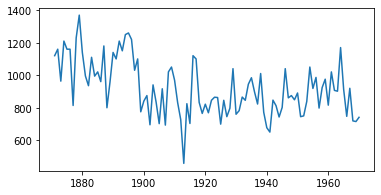

In [4]:
plt.plot(nile.year, nile.val)

## Let's take a look at the hmmlearn API
>Note: hmmlearn use to be part of scikit-learn, it split off to it's own package

The hmmlearn model requires some pre-conditioning of the data.

The following code was given in the lecture:
```python
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

type(hidden_states)
hidden_states.shape
hidden_states[:10]

np.bincount(hidden_states)

plt.plot(hidden_states)
```

### Exercise: How can we package this more conveniently?

In [5]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(f'mus = {mus}')
    print(f'sigmas = {sigmas}')
    
    # re-order parameters in ascending order of mean of underlying distribution
    idx      = np.argsort(mus)
    mus      = mus[idx]
    sigmas   = sigmas[idx]
    transmat = transmat[idx, :][:, idx]
    
    state_dict = {}
    states = [i for i in range(n_states)]
    for i in idx:
        state_dict[i] = states[idx[i]]
    
    relabeled_states = [state_dict[h] for h in hidden_states]
    return (relabeled_states, mus, sigmas, transmat, model)

In [6]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)  # initially using 2 states, then 3 states

mus = [ 796.06732375 1097.27216026  884.87213564]
sigmas = [ 67.19550566 133.0357056  138.81884828]


In [7]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow', color=color)
    ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

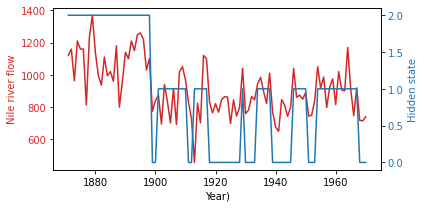

In [8]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: how can we modify the above analysis to make it more meaningful?

In [9]:
np.where(hidden_states == 0)

(array([], dtype=int64),)

In [10]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


mus = [ 796.06732375 1097.27216026  884.87213564]
sigmas = [ 67.19550566 133.0357056  138.81884828]


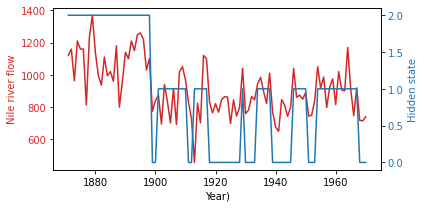

In [11]:
plot_states(nile.val, hidden_states, nile.year)

In [12]:
mus

array([ 796.06732375,  884.87213564, 1097.27216026])

In [13]:
np.set_printoptions(precision = 3, suppress = True)

In [14]:
transmat  # transition matrix, the first regime was never entered hence the 0 probability

array([[0.508, 0.492, 0.   ],
       [0.305, 0.695, 0.   ],
       [0.036, 0.   , 0.964]])

In [15]:
mus

array([ 796.067,  884.872, 1097.272])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

Easy to sample from an existing HMM model

In [16]:
res = np.squeeze(model.sample(1000)[0])  # sample from HMM once it is fit

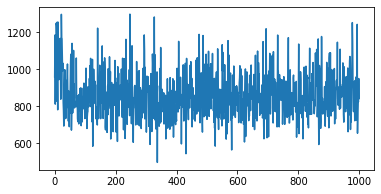

In [17]:
plt.plot(res)

Then refit

In [18]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

mus = [ 796.095  897.169 1052.964]
sigmas = [ 72.367 127.37  148.238]


In [19]:
res.shape

(1000,)

In [20]:
len(hidden_states)

1000

In [21]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

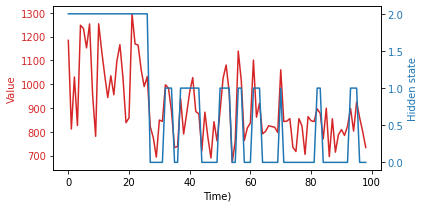

In [22]:
plot_states_no_time(res[1:100], hidden_states[1:100])

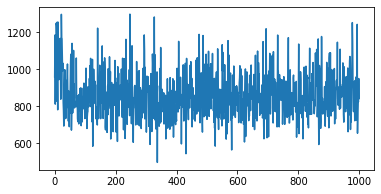

In [23]:
plt.plot(res)

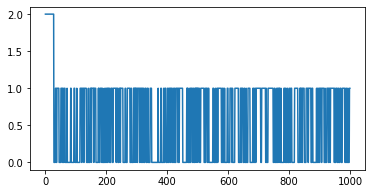

In [24]:
plt.plot(hidden_states)

In [25]:
transmat

array([[0.536, 0.464, 0.   ],
       [0.341, 0.659, 0.   ],
       [0.015, 0.022, 0.964]])

In [26]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

mus = [ 796.095 1052.964  897.169]
sigmas = [ 72.367 148.238 127.37 ]


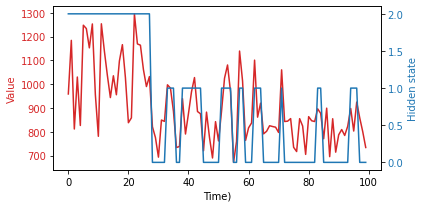

In [27]:
plot_states_no_time(res[:100], hidden_states[:100])

In [28]:
transmat

array([[0.536, 0.464, 0.   ],
       [0.341, 0.659, 0.   ],
       [0.015, 0.022, 0.964]])